In [2]:
import sys

sys.path.append('..')
from envs.wrapper import MultiAgentResizeObsWrapper, MultiAgentRewardWrapper
from mlagents_envs.environment import UnityEnvironment
from envs.multiagent_wrapper import MultiUnityWrapper
from mlagents_envs.envs.unity_gym_env import UnityToGymWrapper

def make_unity_gym(pid=0, size=64, path='envs/pushblock/mac_build.app'):
    worker_id = pid
    print('Making Workder Id :', worker_id)
    env = UnityEnvironment(path, worker_id=worker_id)
    #env = default_registry["VisualPushBlock"].make(worker_id=worker_id, log_folder='logs')
        
    env = MultiUnityWrapper(env, uint8_visual=True)
    # env = MultiAgentResizeObsWrapper(env, (size, size))
    # env = MultiAgentRewardWrapper(env)
    print('Created! Workder Id :', worker_id)
    return env

FileNotFoundError: [Errno 2] No such file or directory: 'config/train.json'

In [3]:
env = make_unity_gym(pid=102, path='../envs/pushblock/mac_build.app')

Making Workder Id : 102


UnityEnvironmentException: Couldn't launch the ../envs/pushblock/mac_build.app environment. Provided filename does not match any environments.

In [4]:
from tqdm import tqdm
env.reset()
for i in range(1000):
    print(i)
    res = env.step({0:4, 1:3})
    print(res[2])
    print(res[3])


0
{0: False, 1: False, '__all__': False}
{'decision_step': <mlagents_envs.base_env.DecisionSteps object at 0x17706e640>, 'terminal_step': {}}
1
{0: False, 1: False, '__all__': False}
{'decision_step': <mlagents_envs.base_env.DecisionSteps object at 0x17706e7c0>, 'terminal_step': {}}
2
{0: False, 1: False, '__all__': False}
{'decision_step': <mlagents_envs.base_env.DecisionSteps object at 0x1768bec70>, 'terminal_step': {}}
3
{0: False, 1: False, '__all__': False}
{'decision_step': <mlagents_envs.base_env.DecisionSteps object at 0x17706e8e0>, 'terminal_step': {}}
4
{0: False, 1: False, '__all__': False}
{'decision_step': <mlagents_envs.base_env.DecisionSteps object at 0x1768be640>, 'terminal_step': {}}
5
{0: False, 1: False, '__all__': False}
{'decision_step': <mlagents_envs.base_env.DecisionSteps object at 0x17706e850>, 'terminal_step': {}}
6
{0: False, 1: False, '__all__': False}
{'decision_step': <mlagents_envs.base_env.DecisionSteps object at 0x17706e640>, 'terminal_step': {}}
7
{0: 

In [5]:
res

({0: array([[[156, 103,  26],
          [156, 103,  26],
          [156, 103,  26],
          ...,
          [156, 103,  26],
          [156, 103,  26],
          [156, 103,  26]],
  
         [[156, 103,  26],
          [156, 103,  26],
          [156, 103,  26],
          ...,
          [156, 103,  26],
          [156, 103,  26],
          [156, 103,  26]],
  
         [[156, 103,  26],
          [156, 103,  26],
          [156, 103,  26],
          ...,
          [156, 103,  26],
          [156, 103,  26],
          [156, 103,  26]],
  
         ...,
  
         [[ 58,  58,  58],
          [ 58,  58,  57],
          [ 58,  58,  58],
          ...,
          [ 42,  42,  41],
          [ 42,  42,  41],
          [ 41,  41,  41]],
  
         [[ 58,  58,  57],
          [ 58,  58,  57],
          [ 58,  58,  57],
          ...,
          [ 41,  41,  41],
          [ 40,  40,  40],
          [ 40,  40,  40]],
  
         [[ 58,  58,  57],
          [ 58,  58,  57],
          [ 58,  58, 

In [23]:
done_dict = {**res[0]['PushBlockCollab?team=0'], **res[1]['PushBlockCollab?team=0']}


In [28]:
done_dict[0]

TerminalStep(obs=[array([[[0.6117647 , 0.40392157, 0.10196079],
        [0.6117647 , 0.40392157, 0.10196079],
        [0.6117647 , 0.40392157, 0.10196079],
        ...,
        [0.6117647 , 0.40392157, 0.10196079],
        [0.6117647 , 0.40392157, 0.10196079],
        [0.6117647 , 0.40392157, 0.10196079]],

       [[0.6117647 , 0.40392157, 0.10196079],
        [0.6117647 , 0.40392157, 0.10196079],
        [0.6117647 , 0.40392157, 0.10196079],
        ...,
        [0.6117647 , 0.40392157, 0.10196079],
        [0.6117647 , 0.40392157, 0.10196079],
        [0.6117647 , 0.40392157, 0.10196079]],

       [[0.6117647 , 0.40392157, 0.10196079],
        [0.6117647 , 0.40392157, 0.10196079],
        [0.6117647 , 0.40392157, 0.10196079],
        ...,
        [0.6117647 , 0.40392157, 0.10196079],
        [0.6117647 , 0.40392157, 0.10196079],
        [0.6117647 , 0.40392157, 0.10196079]],

       ...,

       [[0.22745098, 0.22745098, 0.22745098],
        [0.22745098, 0.22745098, 0.22352941],
    

In [19]:
len(res[1])

1

In [16]:
print(i)
res = env.step({0:4, 1:3})
print(res[2])
print(res[3])


999


IndexError: index 0 is out of bounds for axis 0 with size 0

In [19]:
res[3]

{'decision_step': <mlagents_envs.base_env.DecisionSteps at 0x1776c2a30>,
 'terminal_step': {}}

In [2]:
import torch


In [4]:
ep0 = torch.load('../output/2023-06-26_01-49-51/media/episodes/test/agent0/best_episode_0_epoch_5.pt')
ep1 = torch.load('../output/2023-06-26_01-49-51/media/episodes/test/agent1/best_episode_0_epoch_5.pt')

In [5]:
import matplotlib.pyplot as plt

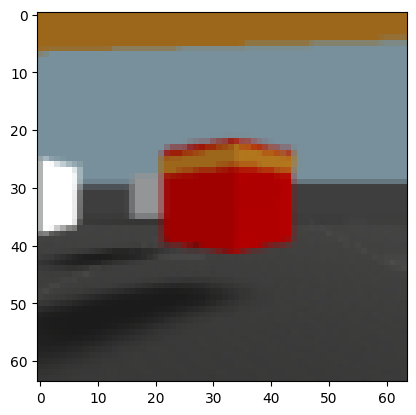

In [6]:
plt.imshow(ep0['observations'][0].permute(1, 2, 0))

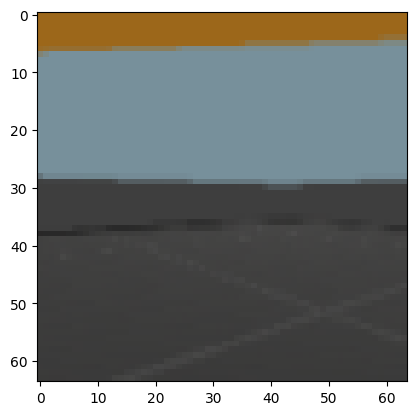

In [7]:
plt.imshow(ep1['observations'][0].permute(1, 2, 0))

In [1]:
a = {0: 0 , 1 : 2}

In [3]:
for i, v in a.items():
    print(i, v)

0 0
1 2
